In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt

In [23]:
import warnings
pd.options.mode.chained_assignment = None 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
pd.set_option('display.max_columns',100)

In [25]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\Airbnb_Open_Data.csv')

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Clean data 

In [26]:
df.columns=df.columns.str.title().str.replace(' ','').str.replace('_','')

In [27]:
df['Price']=df['Price'].str.replace('$','').str.replace(',','').astype(float)
df['ServiceFee']=df['ServiceFee'].str.replace('$','').str.replace(',','').astype(float)

In [28]:
df['LastReview']=pd.to_datetime(df['LastReview'])

In [29]:
df.head()

,Id,Name,HostId,HostIdentityVerified,HostName,NeighbourhoodGroup,Neighbourhood,Lat,Long,Country,CountryCode,InstantBookable,CancellationPolicy,RoomType,ConstructionYear,Price,ServiceFee,MinimumNights,NumberOfReviews,LastReview,ReviewsPerMonth,ReviewRateNumber,CalculatedHostListingsCount,Availability365,HouseRules,License
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Find top rated Neighbourhood

In [8]:
filtered=df[df.NumberOfReviews>200]
grouped=filtered.groupby('Neighbourhood').agg({'ReviewRateNumber':'mean','Price':'mean'}).reset_index()
grouped=grouped.sort_values('ReviewRateNumber',ascending=False)

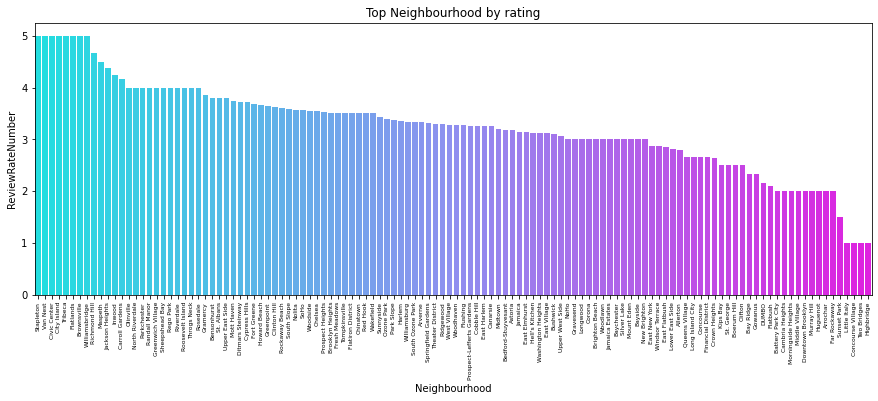

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=grouped,x='Neighbourhood',y='ReviewRateNumber',palette="cool")
plt.xticks(rotation=90,size=6)
plt.title('Top Neighbourhood by rating')
plt.show()

# Where top/worst rated hotels are located in NY City?

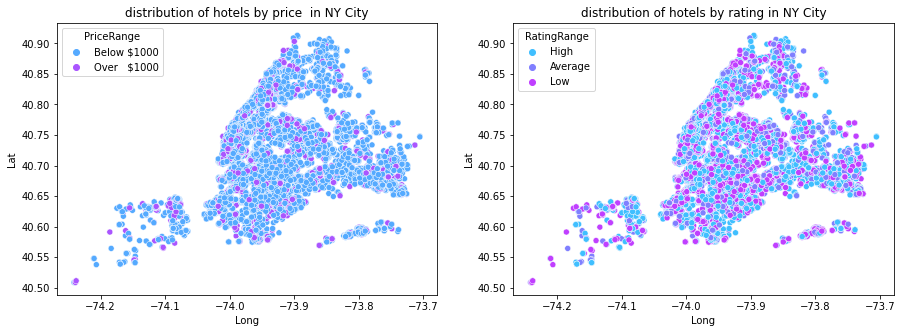

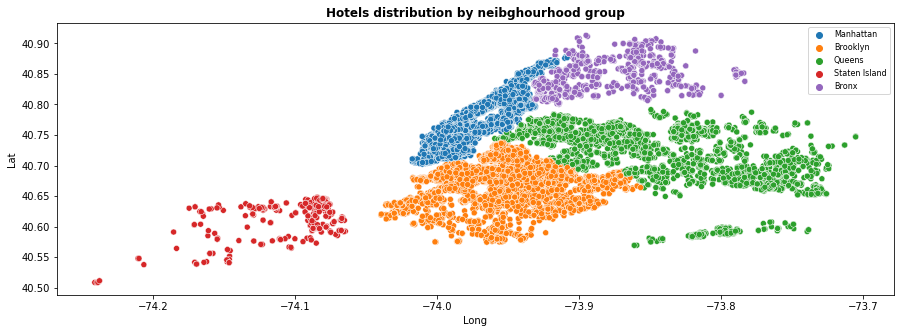

Correlation between price and rating: -0.012892160586343487


In [33]:
filtered=df[df.NumberOfReviews>20]
filtered['PriceRange']=['Over   $1000' if i>=1000 else 'Below $1000' for i in filtered.Price]
filtered['RatingRange']=['Low' if i<3 else 'Average' if i==3 else 'High'for i in filtered.ReviewRateNumber]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=filtered,x='Long',y='Lat',hue='PriceRange',palette='cool',ax=ax1)
ax1.set_title('distribution of hotels by price  in NY City')
sns.scatterplot(data=filtered,x='Long',y="Lat",hue='RatingRange',palette='cool',ax=ax2)
ax2.set_title('distribution of hotels by rating in NY City')
plt.show()

plt.figure(figsize=(15,5))
sns.scatterplot(data=filtered[(filtered.NeighbourhoodGroup.str.contains('manhatan',na=False)==False)&(filtered.NeighbourhoodGroup.str.contains('brookln',na=False)==False)], 
                x='Long',y='Lat',hue='NeighbourhoodGroup')
plt.title('Hotels distribution by neibghourhood group',fontweight='bold')
plt.legend(fontsize=8)
plt.show()

print('Correlation between price and rating: '+str(filtered.Price.corr(filtered.ReviewRateNumber)))

In [11]:
# there is no correlation between hotel price and its rating

# plot the distribution of hotel prices 

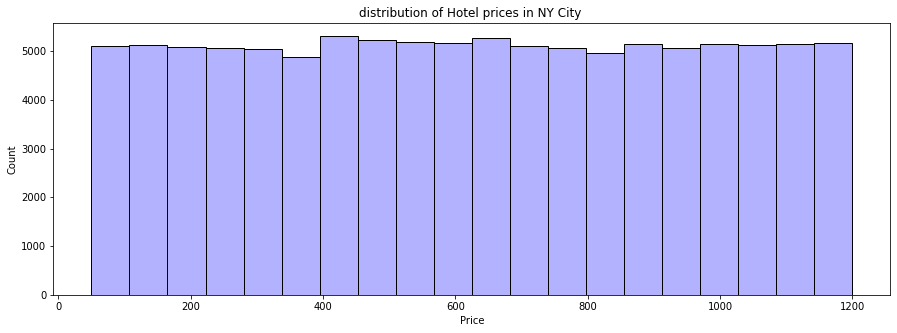

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='Price',kde=False,bins=20,color="blue",alpha=0.3)
plt.title("distribution of Hotel prices in NY City ")
plt.show()

In [13]:
# hotel prices distribution follows uniform distribution shape. 
# There is equal chance for hotel to have any price between 50 and 1200

# How hotels frequencies vary by coordinates

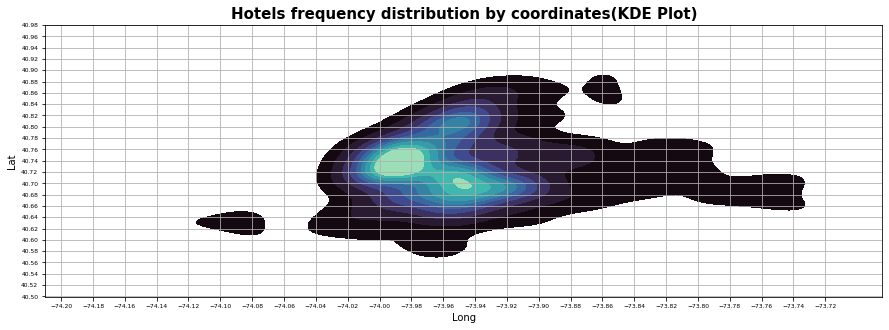

In [14]:
import random
plt.figure(figsize=(15,5))
sns.kdeplot(data=df.sample(n=2000),x='Long',y='Lat',cmap='mako',levels=10,fill=True)
plt.title('Hotels frequency distribution by coordinates(KDE Plot)',fontweight='bold',size=15)

major_ticks = np.arange(-74.2, -73.7,0.02)
minor_ticks = np.arange(40.5, 41,0.02)

plt.xticks(major_ticks,size=6)
plt.yticks(minor_ticks,size=6)
plt.grid(which='major',alpha=1)

plt.show()